# Úloha číslo 1. - Programová implementace SIR modelu

## Stručná dokumentace

V tomto notebooku se nachází implementace a simulace šíření pěti druhů infekcí: chřipky, spalniček, dětské obrny, malárie a tuberkulózy.

### Cíl

Pro každou nemoc jsou zde odpovědi na následující otázky:

1. Kdy dojde k vrcholu epidemie?
2. Jak dlouho epidemie potrvá?
3. Kolik jedinců nakonec onemocní a kolik ne?

### Popis SIR modelu

- S: podíl náchylných (susceptible) lidí v populaci.
- I: podíl infikovaných (infected).
- R: podíl uzdravených (recovered).

### Popis parametrů

- beta (β): pravděpodobnost přenosu infekce.
- gamma (γ): rychlost uzdravení (1 / doba infekčnosti).

### Popis rovnic

- dS/dt = -βSI: lidé přechází z náchylných do nakažených.
- dI/dt = βSI - γI: rozdíl mezi nově nakaženými a uzdravenými.
- dR/dt = γI: uzdravují se nakažení.


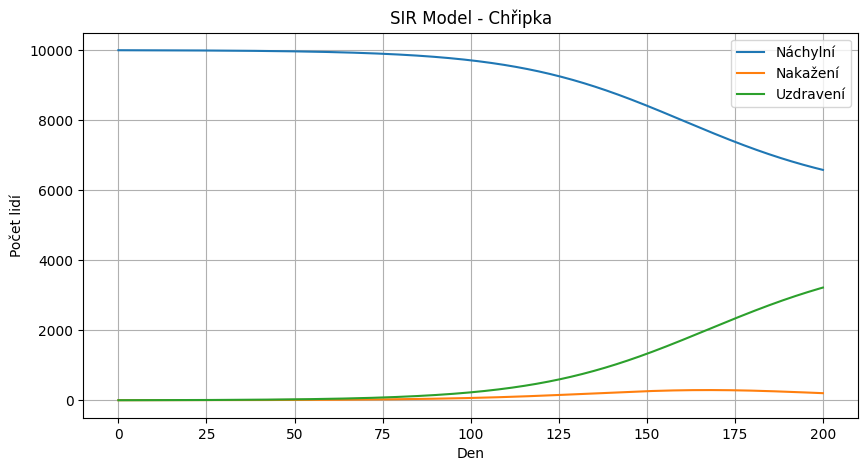

Nemoc: Chřipka
> K vrcholu epidemie dojde cca 167.4. den.
> Epidemie potrvá více než 200.0 dní.
> Celkem onemocní cca 3219 jedinců, zdravých zůstane 6580.



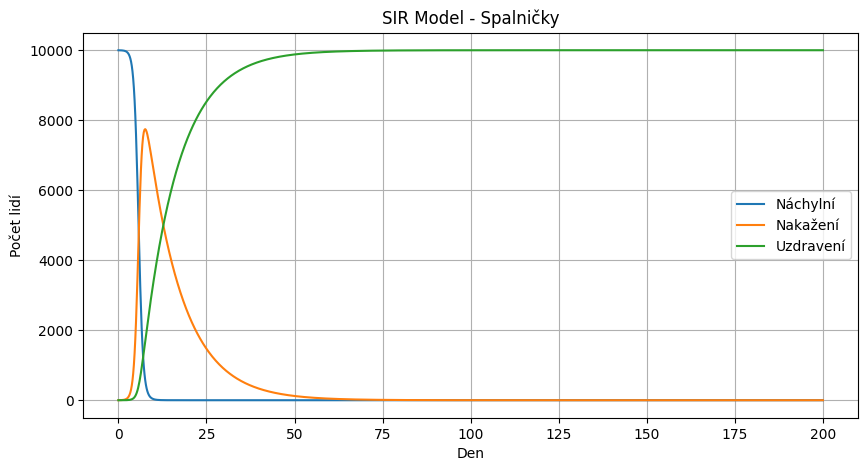

Nemoc: Spalničky
> K vrcholu epidemie dojde cca 7.6. den.
> Epidemie potrvá cca 98.1 dní.
> Celkem onemocní cca 10000 jedinců, zdravých zůstane 0.



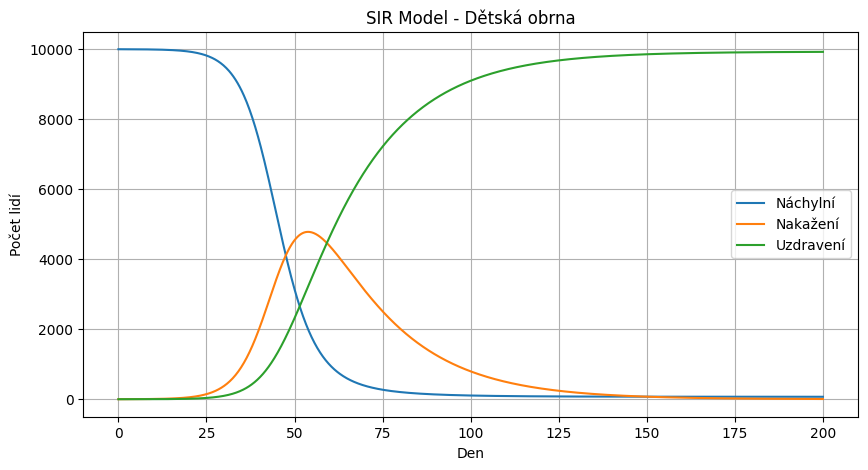

Nemoc: Dětská obrna
> K vrcholu epidemie dojde cca 53.9. den.
> Epidemie potrvá více než 200.0 dní.
> Celkem onemocní cca 9924 jedinců, zdravých zůstane 70.



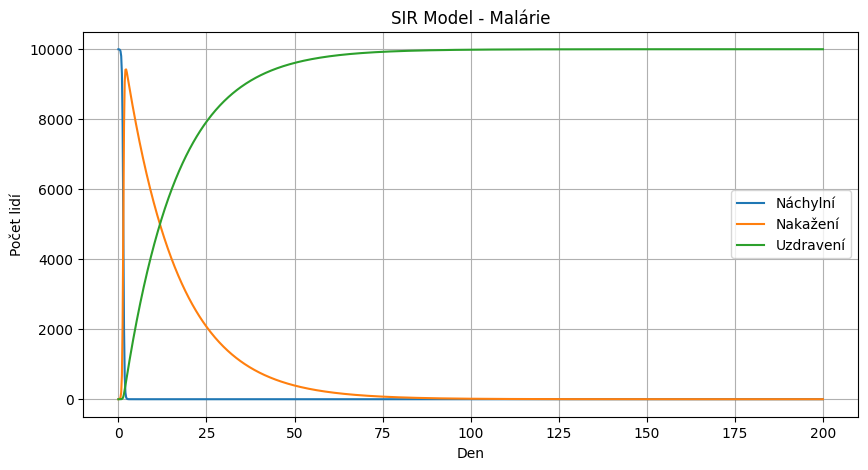

Nemoc: Malárie
> K vrcholu epidemie dojde cca 2.2. den.
> Epidemie potrvá cca 139.7 dní.
> Celkem onemocní cca 10000 jedinců, zdravých zůstane -0.



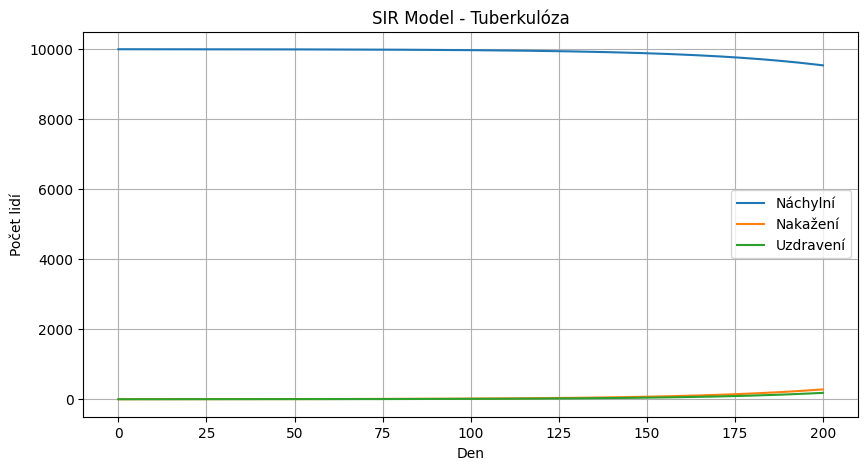

Nemoc: Tuberkulóza
> K vrcholu epidemie dojde cca 200.0. den.
> Epidemie potrvá více než 200.0 dní.
> Celkem onemocní cca 182 jedinců, zdravých zůstane 9537.



In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint


def sir_model(y, t, beta, gamma):
    S, I, R = y
    dS_dt = -beta * S * I
    dI_dt = beta * S * I - gamma * I
    dR_dt = gamma * I
    return [dS_dt, dI_dt, dR_dt]


def gamma_beta_calc(R, inf_d):
    gamma = 1 / inf_d
    beta = R * gamma
    return (gamma, beta)


def analyze_make_graph(title, R0_val, infectious_days):
    # Výpočet gamma a beta, diferenciálních rovnic
    gamma, beta = gamma_beta_calc(R0_val, infectious_days)
    solution = odeint(sir_model, y0, t, args=(beta, gamma))
    S, I, R = solution.T  # rozdělí na jednotlivé složky

    # Graf
    plt.figure(figsize=(10, 5))
    plt.plot(t, S * N, label="Náchylní")
    plt.plot(t, I * N, label="Nakažení")
    plt.plot(t, R * N, label="Uzdravení")
    plt.title(f"SIR Model - {title}")
    plt.xlabel("Den")
    plt.ylabel("Počet lidí")
    plt.legend()
    plt.grid()
    plt.show()

    # Odpovědi
    peak_day = t[np.argmax(I)]
    # První den, kdy počet nakažených < 1
    epidemic_duration = t[np.where(I * N < 1)[0][0]] if any(I * N < 1) else t[-1]
    final_infected = R[-1] * N
    final_susceptible = S[-1] * N

    print(f"Nemoc: {title}")
    print(f"> K vrcholu epidemie dojde cca {peak_day:.1f}. den.")

    if epidemic_duration >= days:
        print(f"> Epidemie potrvá více než {epidemic_duration:.1f} dní.")
    else:
        print(f"> Epidemie potrvá cca {epidemic_duration:.1f} dní.")

    print(
        f"> Celkem onemocní cca {final_infected:.0f} jedinců, zdravých zůstane {final_susceptible:.0f}.\n"
    )


# ------------------ Počáteční parametry + časová osa ------------------

N = 10_000  # Populace
I0 = 1
R0_start = 0
S0 = N - I0 - R0_start
y0 = [S0 / N, I0 / N, R0_start / N]
days = 200
t = np.linspace(
    0, days, 1000
)  # Počet simulovaných dní (200), osa rozdělena na body (1000)

# ------------------ Simulace pro každou nemoc ------------------

analyze_make_graph("Chřipka", R0_val=1.3, infectious_days=7)
analyze_make_graph("Spalničky", R0_val=17, infectious_days=10)
analyze_make_graph("Dětská obrna", R0_val=5, infectious_days=20)
analyze_make_graph("Malárie", R0_val=100, infectious_days=15)
analyze_make_graph("Tuberkulóza", R0_val=2.6, infectious_days=56)
